In [1]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV file

df = pd.read_csv('top250_anime.csv')

In [3]:
# Look at the shape of the dataset - 250 rows and 12 columns

print(df.shape)

(250, 12)


In [4]:
# Look at the first few rows

print(df.head())

   Rank                                              Title  Popularity  \
0     1  Shingeki no Kyojin: The Final Season - Kankets...         609   
1     2                   Fullmetal Alchemist: Brotherhood           3   
2     3                          Bleach: Sennen Kessen-hen         508   
3     4                                        Steins;Gate          13   
4     5                                           Gintama°         335   

                               Genre                 Studio     Type  \
0            Action, Drama, Suspense                  MAPPA  Special   
1  Action, Adventure, Drama, Fantasy                  Bones       TV   
2         Action, Adventure, Fantasy                Pierrot       TV   
3            Drama, Sci-Fi, Suspense              White Fox       TV   
4             Action, Comedy, Sci-Fi  Bandai Namco Pictures       TV   

   Episodes  Duration Start_date End_date    Members  Score  
0       2.0        61     23-Mar     2023   347875.0   9.17 

In [5]:
# Looking at the info

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        250 non-null    int64  
 1   Title       250 non-null    object 
 2   Popularity  250 non-null    int64  
 3   Genre       249 non-null    object 
 4   Studio      248 non-null    object 
 5   Type        250 non-null    object 
 6   Episodes    249 non-null    float64
 7   Duration    250 non-null    int64  
 8   Start_date  250 non-null    object 
 9   End_date    248 non-null    object 
 10  Members     248 non-null    float64
 11  Score       250 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 23.6+ KB
None


In [6]:
# Look at the summary statistics of the dataset

print(df.describe())

             Rank   Popularity    Episodes    Duration       Members  \
count  250.000000   250.000000  249.000000  250.000000  2.480000e+02   
mean   125.500000   855.460000   17.791165   41.720000  6.642592e+05   
std     72.312977  1009.330929   23.988668   35.677178  6.847809e+05   
min      1.000000     1.000000    1.000000    3.000000  1.056600e+04   
25%     63.250000   178.250000    1.000000   23.000000  1.899975e+05   
50%    125.500000   490.000000   12.000000   24.000000  4.154550e+05   
75%    187.750000  1139.000000   24.000000   29.000000  8.616745e+05   
max    250.000000  5794.000000  201.000000  161.000000  3.673536e+06   

            Score  
count  250.000000  
mean     8.546680  
std      0.206665  
min      8.290000  
25%      8.380000  
50%      8.505000  
75%      8.660000  
max      9.170000  


Data Cleaning and Validating

In [7]:
# Checking for missing values

df.isna().sum()

Rank          0
Title         0
Popularity    0
Genre         1
Studio        2
Type          0
Episodes      1
Duration      0
Start_date    0
End_date      2
Members       2
Score         0
dtype: int64

In [8]:
# Dropping Missing Values

df.dropna(inplace=True)
df.isna().sum()

Rank          0
Title         0
Popularity    0
Genre         0
Studio        0
Type          0
Episodes      0
Duration      0
Start_date    0
End_date      0
Members       0
Score         0
dtype: int64

In [9]:
# Checking for Duplicates

print(df.duplicated().sum())

print(df)

0
     Rank                                              Title  Popularity  \
0       1  Shingeki no Kyojin: The Final Season - Kankets...         609   
1       2                   Fullmetal Alchemist: Brotherhood           3   
2       3                          Bleach: Sennen Kessen-hen         508   
3       4                                        Steins;Gate          13   
4       5                                           Gintama°         335   
..    ...                                                ...         ...   
245   246                                          Blue Lock         439   
246   247  Detective Conan Movie 06: The Phantom of Baker...        2289   
247   248                      Diamond no Ace: Second Season        1541   
248   249                                Hibike! Euphonium 2        1017   
249   250                                      Ashita no Joe        2112   

                                 Genre                    Studio     Type  \
0       

In [10]:
# Looking at the data types

df.dtypes

Rank            int64
Title          object
Popularity      int64
Genre          object
Studio         object
Type           object
Episodes      float64
Duration        int64
Start_date     object
End_date       object
Members       float64
Score         float64
dtype: object

In [11]:
# Changing Members data type to int and checking to see if it updated

df['Members'] = df['Members'].astype(int)
df['Episodes'] = df['Episodes'].astype(int)
df['Popularity'] = df['Popularity'].astype(int)

df.dtypes

Rank            int64
Title          object
Popularity      int32
Genre          object
Studio         object
Type           object
Episodes        int32
Duration        int64
Start_date     object
End_date       object
Members         int32
Score         float64
dtype: object

In [12]:
# Changing the rank so that it matches to 244 instead of 250

df = df.reset_index(drop=True)
df = df.drop('Rank', axis = 1)
df = df.rename(columns={'index':'Rank'})
df['Rank'] = df.index + 1
df = df.set_index('Rank')

print(df)

                                                  Title  Popularity  \
Rank                                                                  
1     Shingeki no Kyojin: The Final Season - Kankets...         609   
2                      Fullmetal Alchemist: Brotherhood           3   
3                             Bleach: Sennen Kessen-hen         508   
4                                           Steins;Gate          13   
5                                              Gintama°         335   
...                                                 ...         ...   
240                                           Blue Lock         439   
241   Detective Conan Movie 06: The Phantom of Baker...        2289   
242                       Diamond no Ace: Second Season        1541   
243                                 Hibike! Euphonium 2        1017   
244                                       Ashita no Joe        2112   

                                  Genre                    Studio     Type  

Scores

count    244.000000
mean       8.548934
std        0.206968
min        8.290000
25%        8.387500
50%        8.510000
75%        8.660000
max        9.170000
Name: Score, dtype: float64


<Axes: xlabel='Score'>

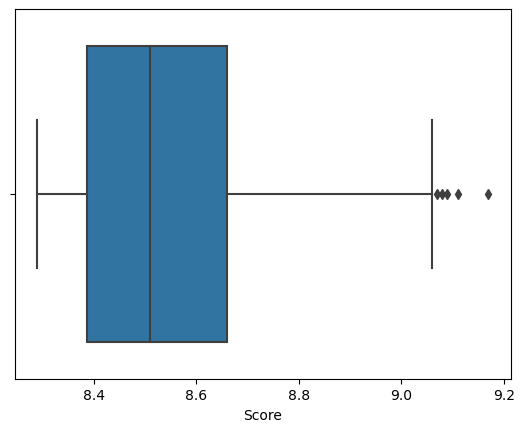

In [25]:
# Looking at the stats of the data set

print(df['Score'].describe())
sns.boxplot(x=df['Score'])

Correlations

In [14]:
# Setting up for a heat map

anime_corr = df.corr(numeric_only=True)
print(anime_corr)

            Popularity  Episodes  Duration   Members     Score
Popularity    1.000000 -0.129701  0.092177 -0.589287 -0.208437
Episodes     -0.129701  1.000000 -0.374447  0.163362  0.170959
Duration      0.092177 -0.374447  1.000000 -0.115586  0.028021
Members      -0.589287  0.163362 -0.115586  1.000000  0.233903
Score        -0.208437  0.170959  0.028021  0.233903  1.000000


<Axes: >

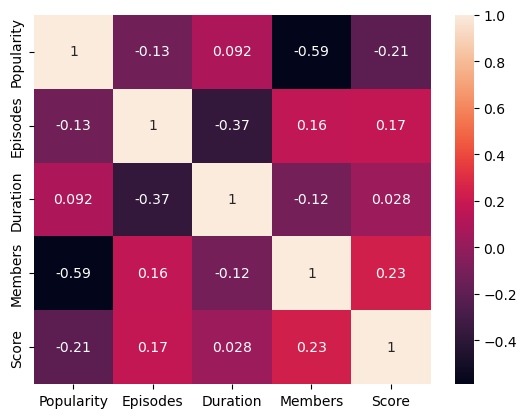

In [26]:
# Creating heatmap with Seaborn
'''
Looking at the correlation between members and popularity you might think that there maybe a mistake here because should it be a 
positve correlation between members and popularity? You are right it should be but for the popularity column, the values are rank. 
So the most popular anime is rank 1 so that is why it is negativly correlated here. As popularity rank decreases, members increases.
'''

sns.heatmap(anime_corr,annot=True)

Anime Types

In [16]:
# Looking at all the types of animes

print(df['Type'].unique())

['Special' 'TV' 'Movie' 'OVA' 'ONA' 'Music']


In [17]:
# Removing music from Type beacuse this is more about shows instead of music

df2 = df[df['Type'] != 'Music']
type_count = df2['Type'].value_counts()
print(type_count)

TV         160
Movie       54
OVA         10
ONA         10
Special      9
Name: Type, dtype: int64


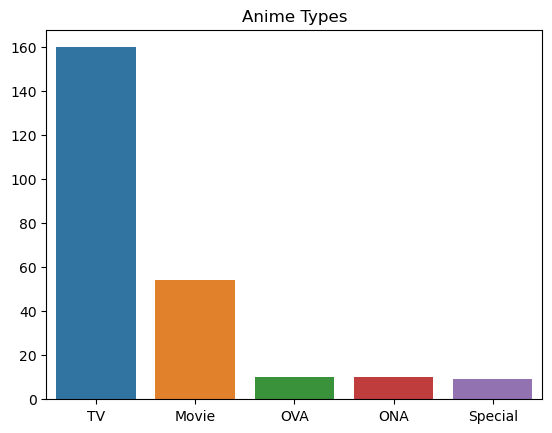

In [18]:
# Creating a list so that it is in the order I want it to be

types = ['TV','Movie','OVA','ONA','Special']
type_values = [160,54,10,10,9]

# Showing a barplot with seaborn and as we can see, TV ranks the highest

sns.barplot(data=df2,x=types,y=type_values)
plt.title('Anime Types')
plt.show()

Anime Studios Based on Score

In [19]:
# Looking at anime studios and seeing which one has the most animes in the top 250 anime in 2023 dataset

studio_count = df['Studio'].value_counts()
studio_score = df.groupby('Studio').agg({'Score' : ['mean','min','max']})
studio_pop = df.groupby('Studio').agg({'Popularity' : ['mean','min','max']})

print(studio_count.head())
print(studio_score.head())
print(studio_pop.head())

Madhouse           15
Shaft              13
Sunrise            11
Kyoto Animation    11
Production I.G     10
Name: Studio, dtype: int64
                    Score            
                     mean   min   max
Studio                               
8bit             8.336667  8.30  8.39
A-1 Pictures     8.585000  8.31  9.06
Aniplex          8.440000  8.44  8.44
Artland          8.611667  8.44  8.73
B.CMAY PICTURES  8.500000  8.43  8.62
                  Popularity            
                        mean   min   max
Studio                                  
8bit              301.666667   183   439
A-1 Pictures      469.600000    23  1872
Aniplex          1272.000000  1272  1272
Artland          1159.000000   208  1953
B.CMAY PICTURES  1784.333333  1024  2375


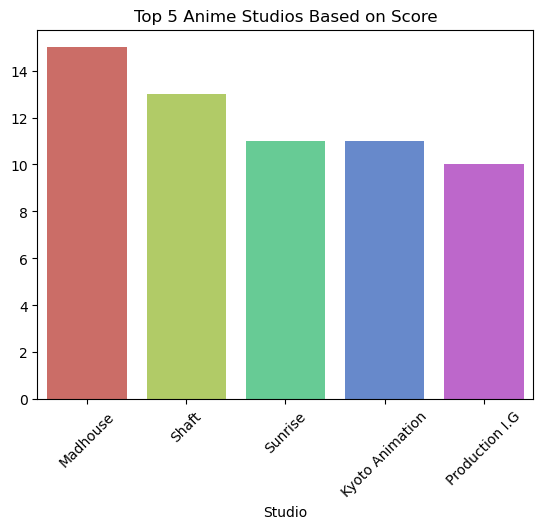

In [20]:
# Creating a visual to showcase that Madhouse has the most animes in the top 250 animes in 2023 dataset

studios = ['Madhouse','Shaft','Sunrise','Kyoto Animation','Production I.G']
studio_values = [15,13,11,11,10]

sns.barplot(data=df,x=studios,y=studio_values, palette='hls')
plt.title('Top 5 Anime Studios Based on Score')
plt.xlabel('Studio')
plt.xticks(rotation=45)
plt.show()

Genres

In [21]:
# Looking at the Genres 

genre_count = df['Genre'].value_counts()
genre_score = df.groupby('Genre').agg({'Score' : ['mean','min','max']})
genre_pop = df.groupby('Genre').agg({'Popularity' : ['mean','min','max']})

print(genre_count.head())
print(genre_score.head())
print(genre_pop.head())

Sports                                16
Action, Comedy, Sci-Fi                12
Drama, Slice of Life, Supernatural    10
Drama, Romance                         8
Comedy                                 7
Name: Genre, dtype: int64
                                           Score            
                                            mean   min   max
Genre                                                       
 Action, Award Winning, Drama, Sci-Fi      8.910  8.91  8.91
Action                                     8.528  8.33  8.81
Action, Adventure                          8.450  8.45  8.45
Action, Adventure, Award Winning, Fantasy  8.670  8.67  8.67
Action, Adventure, Award Winning, Sci-Fi   8.630  8.63  8.63
                                          Popularity            
                                                mean   min   max
Genre                                                           
 Action, Award Winning, Drama, Sci-Fi           47.0    47    47
Action               

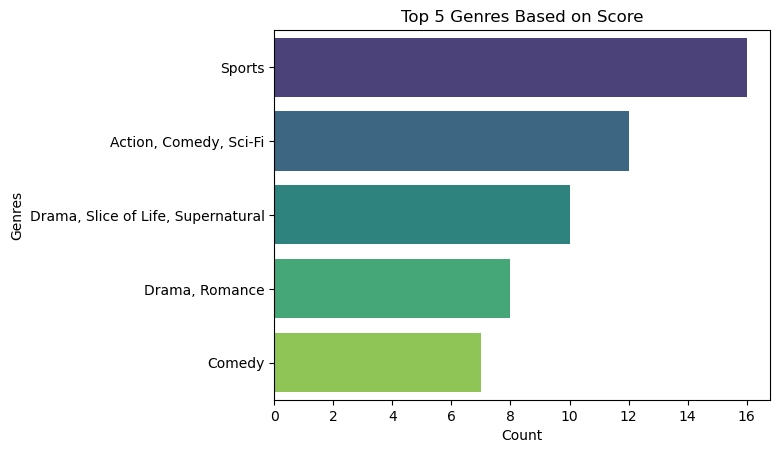

In [27]:
# Creating a Visual to show what we found above and can see that Sports come up the most with 16 animes in the top 250

genres = ['Sports','Action, Comedy, Sci-Fi','Drama, Slice of Life, Supernatural','Drama, Romance','Comedy']
genre_values = [16,12,10,8,7]

sns.color_palette("viridis", as_cmap=True)

sns.barplot(data=df,x=genre_values,y=genres, palette='viridis')
plt.title('Top 5 Genres Based on Score')
plt.xlabel('Count')
plt.ylabel('Genres')

plt.show()

Rank vs Popularity

Top Animes

Text(0.5, 1.0, 'Top 10 Anime based on Popularity')

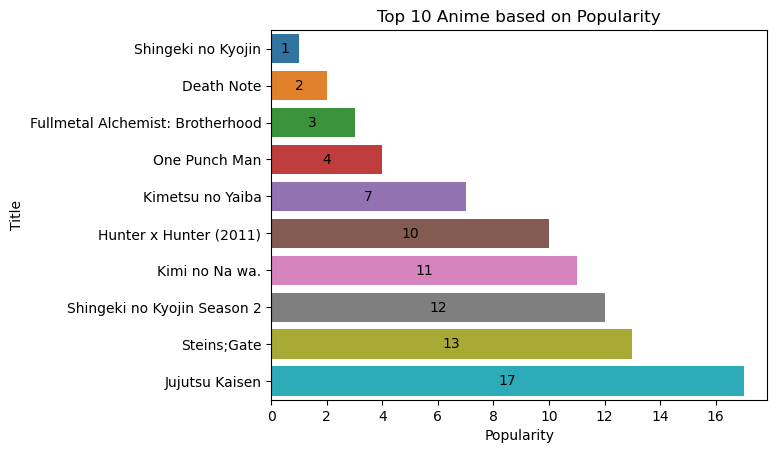

In [23]:
# Looking at the top 10 animes and Shingeki no Kyojin or Attack on Titan is at the top

sort_rank = df.sort_values(['Popularity'], ascending = True).head(10)
v1 = sns.barplot(data=sort_rank, x='Popularity', y='Title')
v1.bar_label(v1.containers[0], label_type='center')
plt.title('Top 10 Anime based on Popularity')

Text(0.5, 1.0, 'Top 10 Animes with the Most Episodes')

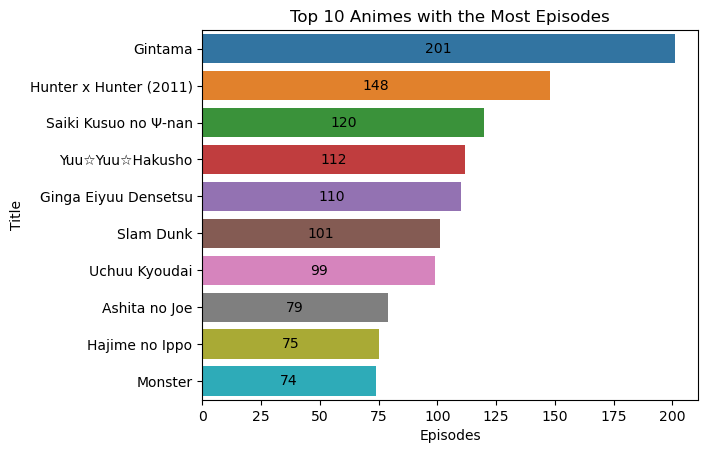

In [24]:
# Looking at the animes with the most episodes in the top 250 animes we have Gintama with over 200 episodes 

sort_rank = df.sort_values(['Episodes'], ascending = False).head(10)
v1 = sns.barplot(data=sort_rank, x='Episodes', y='Title')
v1.bar_label(v1.containers[0], label_type='center')
plt.title('Top 10 Animes with the Most Episodes')